In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0.82
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0.39


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
data.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
532,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0.13
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,0.90
145,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0.13
268,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0.20
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,0.87
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2,0.75
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0.14
102,54,1,1,108,309,0,1,156,0,0.0,2,0,3,0.70
176,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0.25
654,41,0,1,126,306,0,1,163,0,0.0,2,0,2,0.77


In [12]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3,0.82
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0.14
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0.17
679,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0.11
928,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0.23


In [13]:
data = data.rename(columns={'age':'Age', 'sex':'Sex', 'cp':'Cp','trestbps':'Trestbps','chol':'Chol',
                            'fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang',
                            'oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [14]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [15]:
data.shape

(1025, 14)

In [16]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

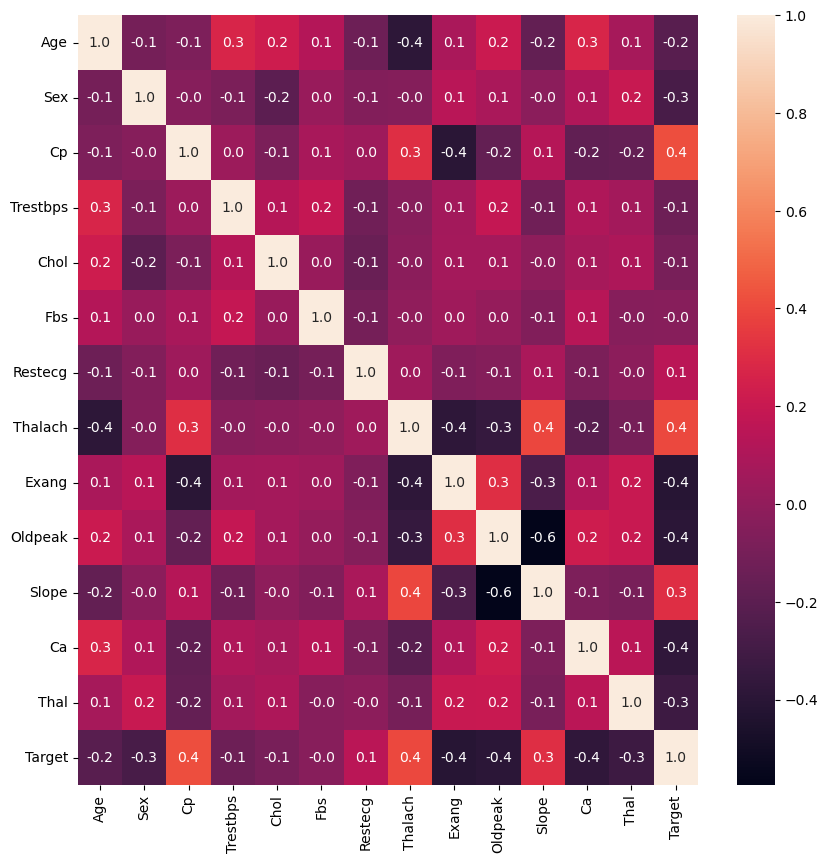

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

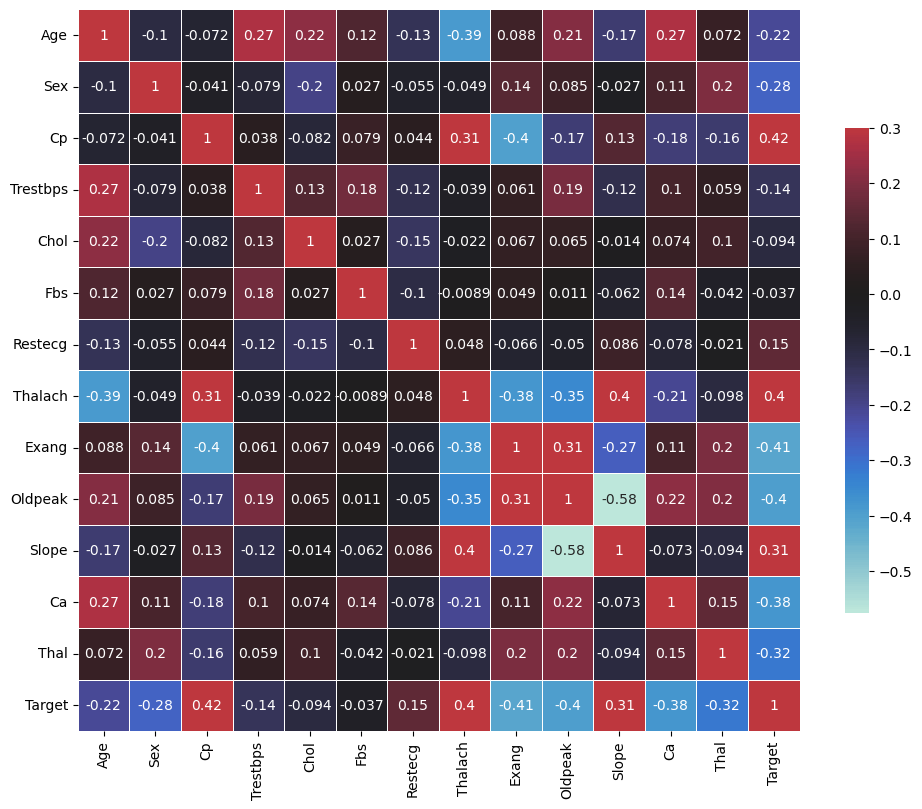

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)
plt.tight_layout()
plt.show()

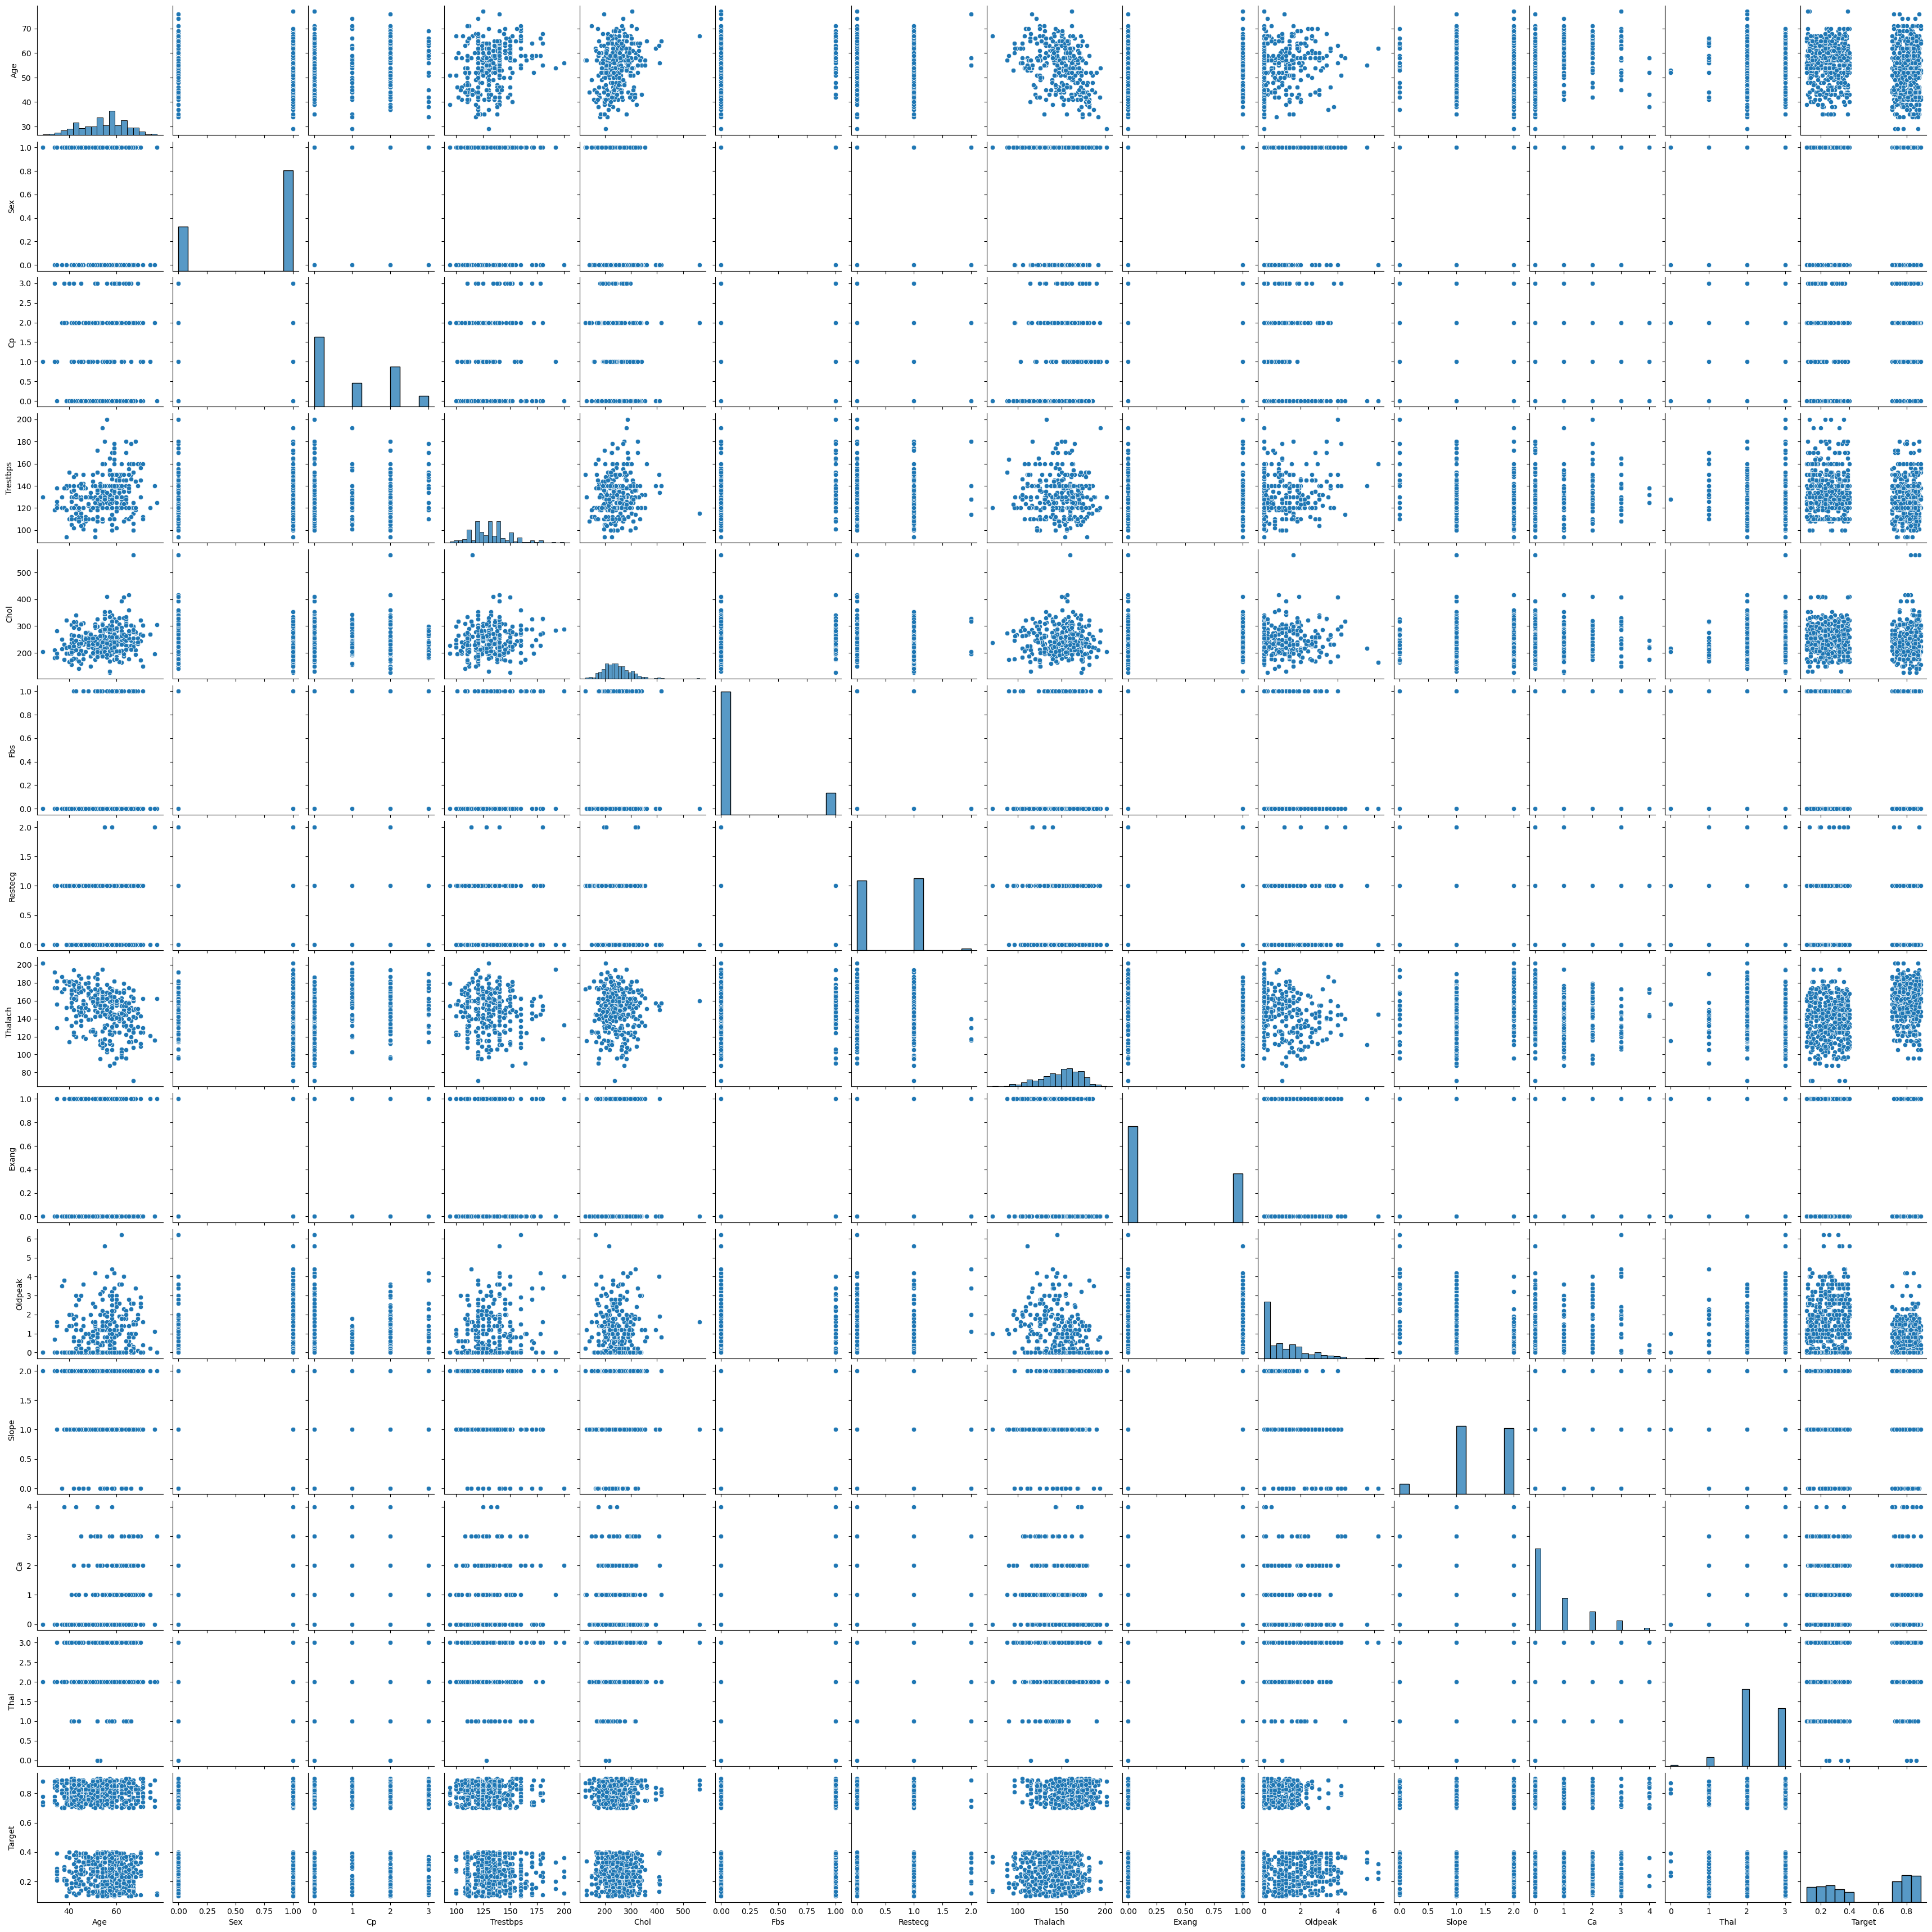

In [30]:
sns.pairplot(data)
plt.show()

In [32]:
data.Age.value_counts()[:10]

Age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
Name: count, dtype: int64

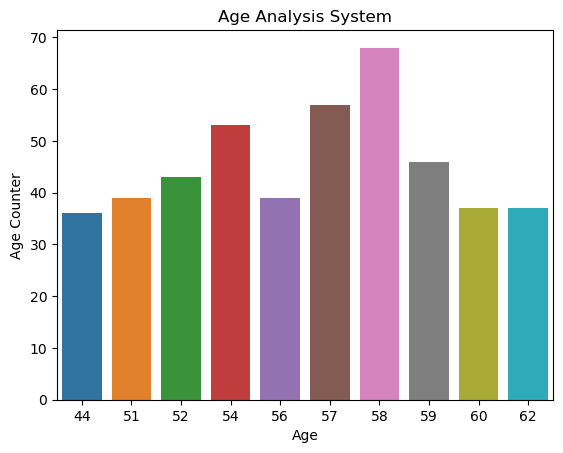

In [34]:
sns.barplot(x=data.Age.value_counts()[:10].index,
            y = data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [35]:
minAge = min(data.Age)
maxAge = max(data.Age)
meanAge = data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


In [36]:
young_ages = data[(data.Age >= 29) & (data.Age < 40)]
middle_ages = data[(data.Age >= 40) & (data.Age < 55)]
elderly_ages = data[(data.Age > 55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 57
Middle Ages : 419
Elderly Ages : 519


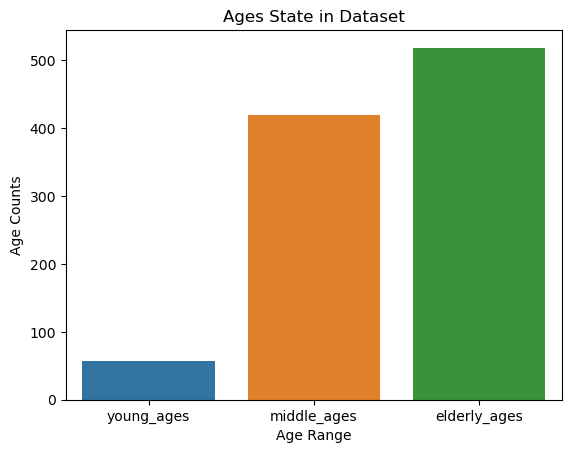

In [37]:
sns.barplot(x=['young_ages', 'middle_ages', 'elderly_ages'],
            y = [len(young_ages), len(middle_ages), len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [38]:
data['AgeRange'] = 0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

In [39]:
for index in elderlyAge_index:
    data.loc[index, 'AgeRange'] = 2

for index in middleAge_index:
    data.loc[index, 'AgeRange'] = 1

for index in youngAge_index:
    data.loc[index, 'AgeRange'] = 0        

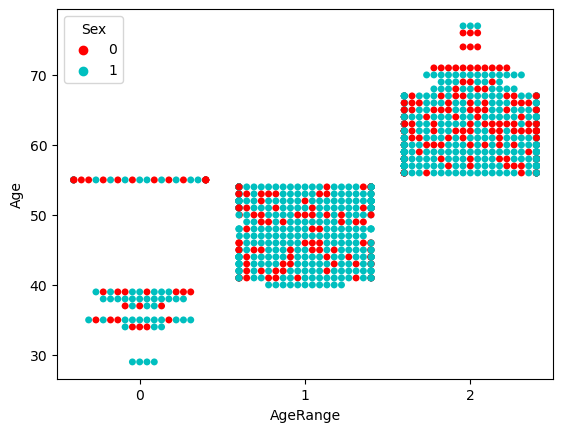

In [42]:
sns.swarmplot(x="AgeRange", y='Age', hue="Sex", palette=['r','c','y'], data=data)
plt.show()

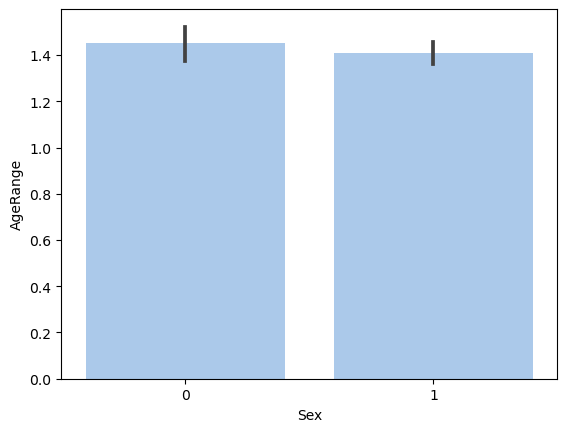

In [43]:
sns.set_color_codes('pastel')
sns.barplot(y="AgeRange", x="Sex", data=data,
            label="Total", color="b")
plt.show()

In [47]:
elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum')

Sex
0    25211
1    48730
Name: Thalach, dtype: int64

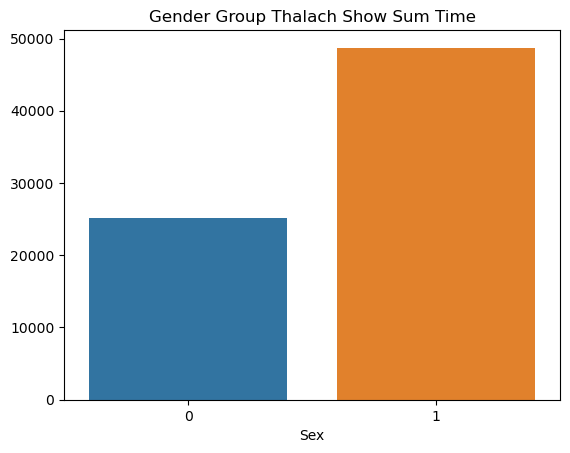

In [48]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values)
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

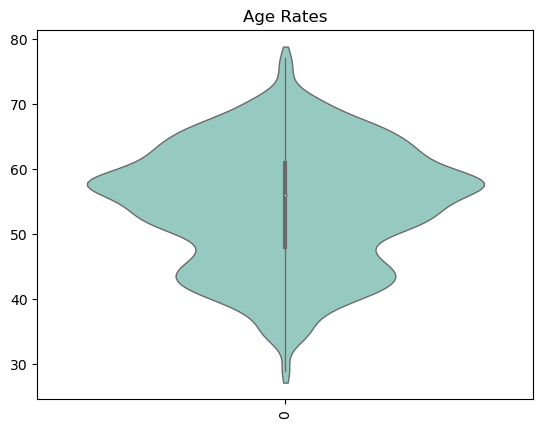

In [49]:
sns.violinplot(data.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


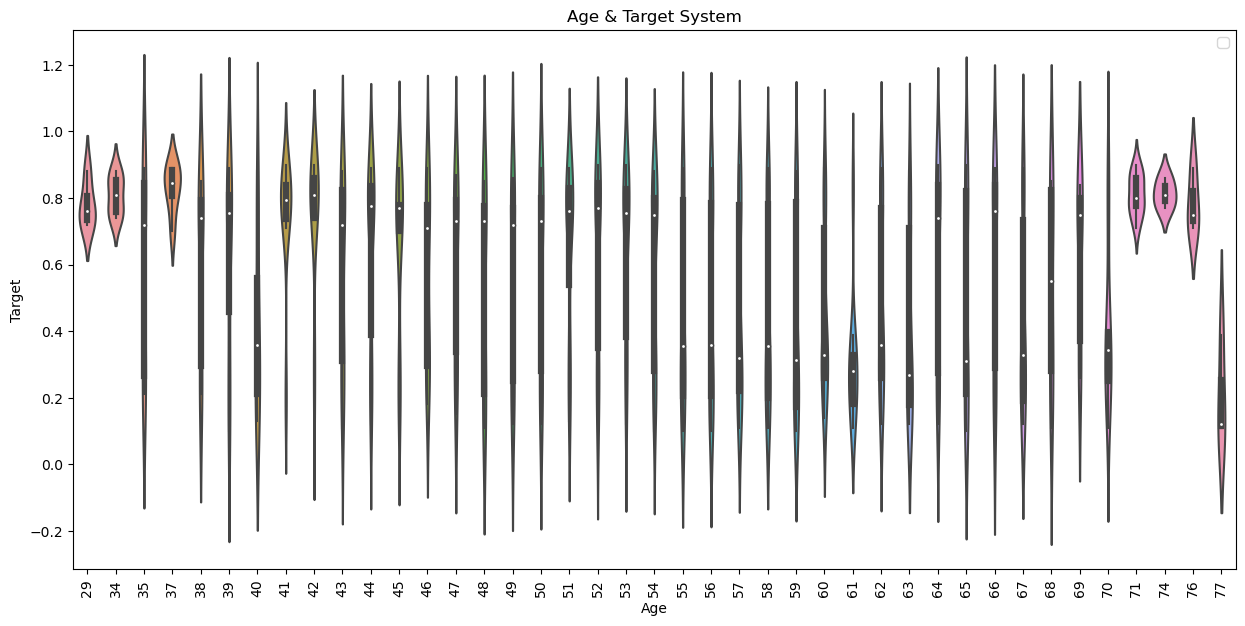

In [50]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.Age,y=data.Target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

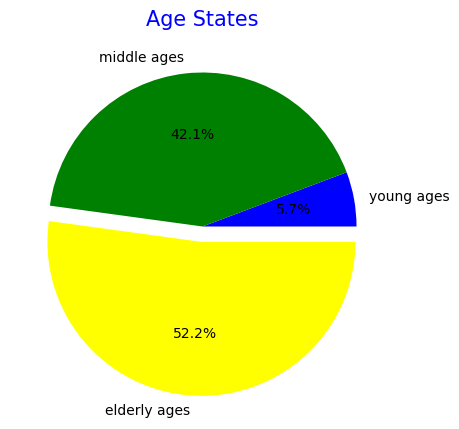

In [51]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

### Sex (Gender) Analysis

In [52]:
data.Sex.value_counts()

Sex
1    713
0    312
Name: count, dtype: int64

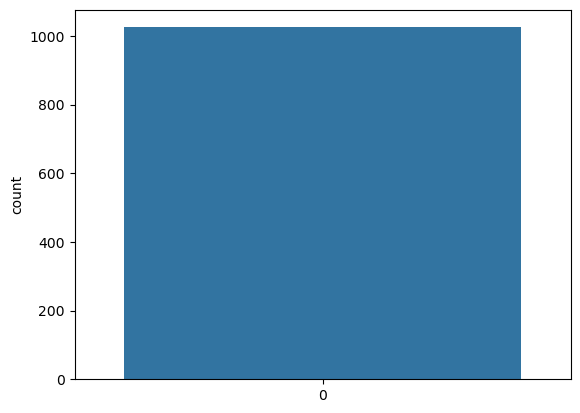

In [53]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

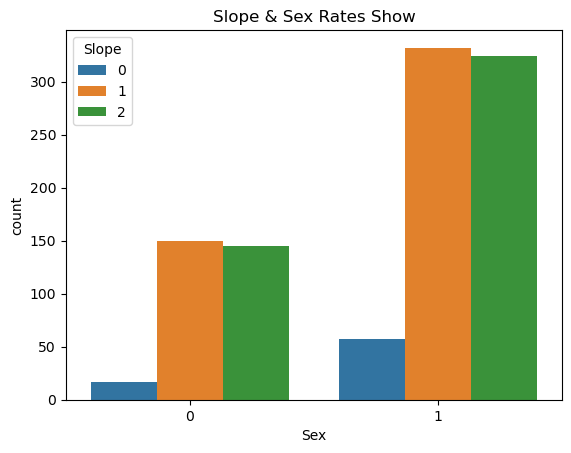

In [55]:
sns.countplot(x='Sex', hue='Slope', data=data)
plt.title('Slope & Sex Rates Show')
plt.show()

In [56]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 1025
Male Count    : 713
Female Count  : 312


In [57]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 69.56%
Female State: 30.44%


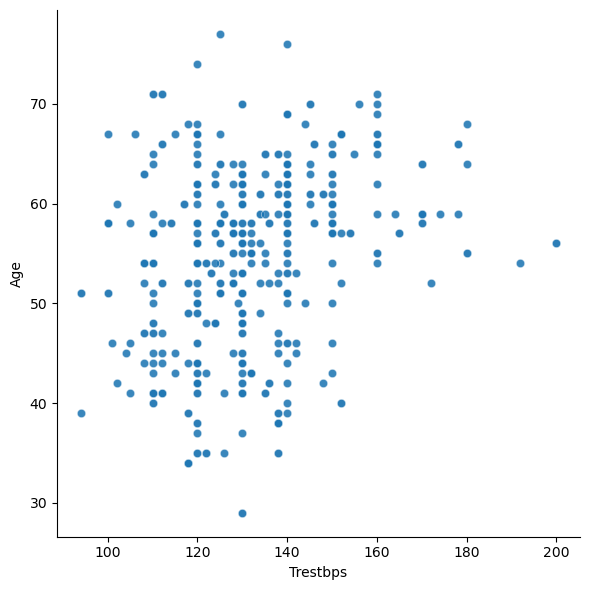

In [63]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

In [64]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21,2


### Chest Pain Type Analysis

In [65]:
#As seen, there are 4 types of chest pain.
data.Cp.value_counts()

Cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

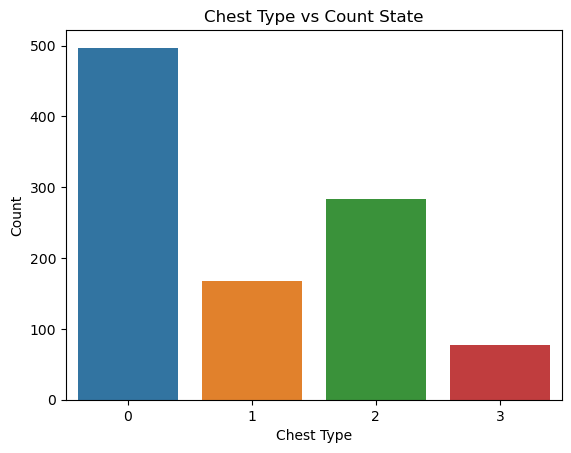

In [68]:
sns.countplot(data=data, x='Cp')
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

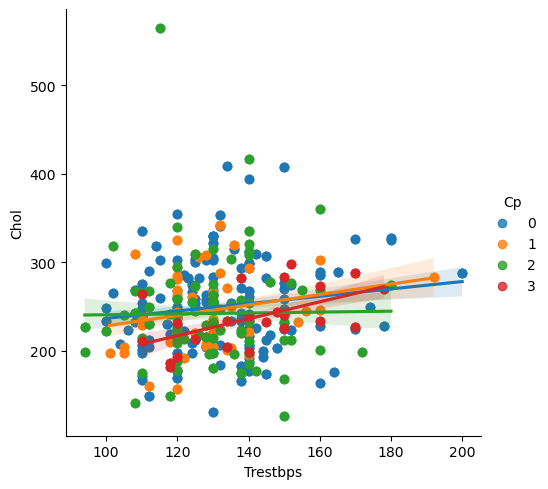

In [73]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Trestbps", y="Chol",data=data,hue="Cp")
plt.show()

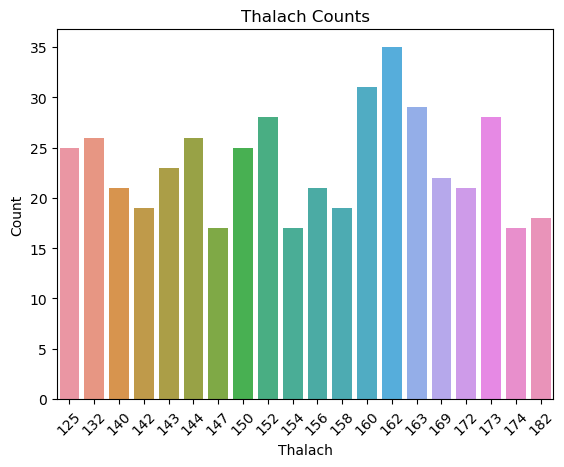

In [78]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

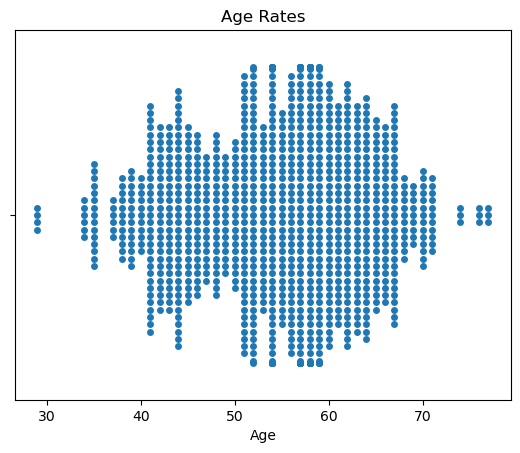

In [79]:
sns.swarmplot(x=data.Age)
plt.title('Age Rates')
plt.show()